In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import joblib

# Load Data
* Handle missing values, duplicated values, outlier

In [2]:
total = pd.read_csv("/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/data/data_preparation/data_preparation.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,,
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66
2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87
2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75


In [3]:
df.shape

(3423, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3423 entries, 2023-11-03 to 2010-04-01
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GOLD_open   3423 non-null   float64
 1   GOLD_high   3423 non-null   float64
 2   GOLD_low    3423 non-null   float64
 3   GOLD_close  3423 non-null   float64
 4   copper      3423 non-null   float64
 5   crude_oil   3423 non-null   float64
 6   DXY         3423 non-null   float64
 7   EURUSD      3423 non-null   float64
 8   MSCI        3423 non-null   float64
 9   NASDAQ      3423 non-null   float64
 10  NLR         3423 non-null   float64
 11  platinum    3423 non-null   float64
 12  RUT         3423 non-null   float64
 13  silver      3423 non-null   float64
 14  SP500       3423 non-null   float64
 15  VIX         3423 non-null   float64
dtypes: float64(16)
memory usage: 454.6 KB


In [5]:
df.describe()

,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
count,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000
mean,1488.210488,1498.695998,1476.962869,1487.994332,3.247181,71.627350,91.413742,1.195920,189.348583,6943.137756,51.782723,1168.948729,1351.911145,21.649980,2537.427067,18.594940
std,267.533166,269.780564,264.782930,267.328340,0.671831,22.241466,9.025438,0.112538,186.302973,3890.770421,7.312556,308.315804,446.438337,6.323651,1047.150201,7.184007
min,1051.500000,1062.700000,1045.400000,1049.600000,1.943500,11.570000,72.930000,0.959600,25.590000,2091.790000,34.080000,596.800000,590.030000,11.772000,1022.580000,9.140000
25%,1257.750000,1265.900000,1251.050000,1257.500000,2.710000,52.250000,81.825000,1.107800,38.990000,3660.060000,47.715000,927.650000,1021.120000,16.766000,1685.835000,13.630000
50%,1384.800000,1394.400000,1372.100000,1385.100000,3.185000,71.570000,93.840000,1.169500,87.650000,5555.330000,50.510000,1023.300000,1295.800000,19.691000,2271.720000,16.790000
75%,1738.550000,1752.900000,1725.250000,1739.650000,3.737500,91.690000,97.620000,1.298100,335.095000,9845.665000,53.990000,1447.950000,1661.300000,24.991000,3246.250000,21.525000
max,2076.400000,2089.200000,2049.000000,2069.400000,4.937500,123.700000,114.100000,1.483100,675.150000,16057.440000,82.350000,1905.700000,2442.740000,48.599000,4796.560000,82.690000


<Axes: >

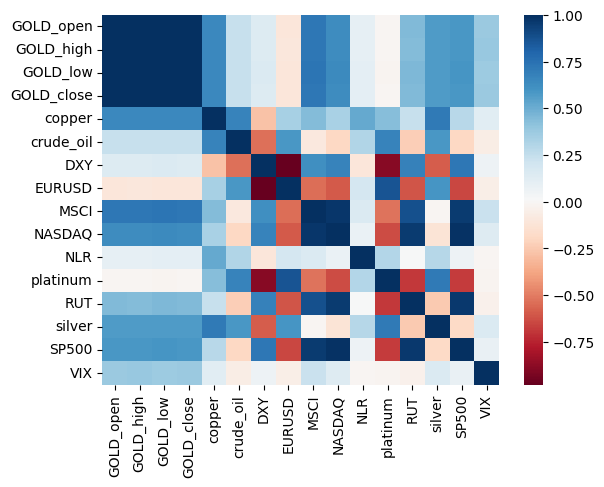

In [6]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [7]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2010,3,31)
Test_day = date(2021,11,16)
End_day = date(2023,11,3)


# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [8]:
total.shape

(3423, 17)

In [9]:
X_train_valid = train_dataset.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_train_valid = train_dataset["GOLD_close"][1:].reset_index(drop=True)

start_valid = date(2010,3, 31)
valid_day = date(2019,10,16)
end_valid = date(2021,11,16)

train_valid = total[(total["Date"] >= start_valid) & (total["Date"] <= end_valid)].reset_index(drop = True)
train_val = train_valid[train_valid["Date"] < valid_day].reset_index(drop = True)
valid_val = train_valid[train_valid["Date"] >= valid_day].reset_index(drop = True)

X_train = train_val.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_train = train_val["GOLD_close"][1:].reset_index(drop=True)

X_valid = valid_val.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_valid = valid_val["GOLD_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_test = test_dataset["GOLD_close"][1:].reset_index(drop=True)

In [10]:
test_ratio = len(test_dataset) / len(total)
valid_ratio = len(valid_val) / len(train_valid)

print("Tỉ lệ test_data/total:", test_ratio)
print("Tỉ lệ valid_data/train_valid:", valid_ratio)

Tỉ lệ test_data/total: 0.1446099912357581
Tỉ lệ valid_data/train_valid: 0.1799248890406282


In [11]:
print("Training_Valid Features Shape:", X_train_valid.shape)
print("Training_Valid Labels Shape:", y_train_valid.shape)

print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)

print("Valid Features Shape:", X_valid.shape)
print("Valid Labels Shape:", y_valid.shape)

print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training_Valid Features Shape: (2927, 15)
Training_Valid Labels Shape: (2927,)
Train Features Shape: (2401, 15)
Train Labels Shape: (2401,)
Valid Features Shape: (526, 15)
Valid Labels Shape: (526,)
Testing Features Shape: (494, 15)
Testing Labels Shape: (494,)


In [12]:
print('{:0.1f} years of data in the training set'.format(X_train_valid.shape[0] / 365.))
print('{:0.1f} years of data in the test set'.format(X_test.shape[0] / 365.))

8.0 years of data in the training set
1.4 years of data in the test set


# Load Model

In [13]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

### Examine the Default Random Forest to Determine Parameters


1. We will use these parameters as a starting point. 
2. Based on sklearn's random forest documentation, I determined what features to change and what options are available.

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 timeseriessplit
tscv = TimeSeriesSplit(n_splits=3)

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = tscv, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [17]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 8,
 'bootstrap': True}

#### Top 10 best_params_

In [18]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [19]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

100
Model with rank: 1
Mean validation score: -23.389 (std: 11.467)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 2
Mean validation score: -23.442 (std: 11.121)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 3
Mean validation score: -23.454 (std: 11.356)
Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 4
Mean validation score: -23.535 (std: 11.329)
Parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 5
Mean validation score: -24.277 (std: 9.380)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 

### Evaluation Function

In [20]:
y_test = np.array(y_test)

def ACC(model, X_test, y_test, X_train_valid, y_train_valid):    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_valid)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_valid, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_valid,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_test,y_pred))
    print()
    
    sns.displot(y_test - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_test, color = 'red', label="GOLD Price")
    ax.plot(y_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()
    
def AUC(model, X_valid, y_valid, X_train, y_train):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_valid)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_val_pred))

    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_valid, y_val_pred)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", train_rmse)

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", train_mape)
    print()
    

    print("Test accuracy for valid set")
    #RMSE
    print("Root Mean Square Error (RMSE):", val_rmse)

    #MAPE
    print(" Mean Absolute Percentage Error (MAPE):", val_mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_valid,y_val_pred))
    print()
    
    sns.displot(y_valid - y_val_pred, kde=True)
    plt.xlabel('y_valid - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_valid, y=y_val_pred)
    plt.xlabel('y_valid')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_valid, color = 'red', label="GOLD Price")
    ax.plot(y_val_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()

    train_valid['Date'] = pd.to_datetime(train_valid['Date'][:-1])
    test_dataset['Date'] = pd.to_datetime(test_dataset['Date'][:len(y_valid)])

    fig, ax = plt.subplots(figsize=(25, 5))

    ax.plot(train_valid['Date'][:-1], train_valid['GOLD_close'][1:], color='blue', label="Training Data")
    ax.plot(valid_val['Date'][:-1], y_valid, color='orange', label="Validation Data")
    ax.plot(valid_val['Date'][:-1], y_val_pred, color='green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Format the y-axis
    plt.legend()
    plt.show()


### Evaluate the Default Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 2.271335880170471
Mean Absolute Percentage Error (MAPE): 0.0010518111132514925

Test accuracy for valid set
Root Mean Square Error (RMSE): 34.70236255257043
 Mean Absolute Percentage Error (MAPE): 0.00964998292068539

R2 score: 0.9371206514709307



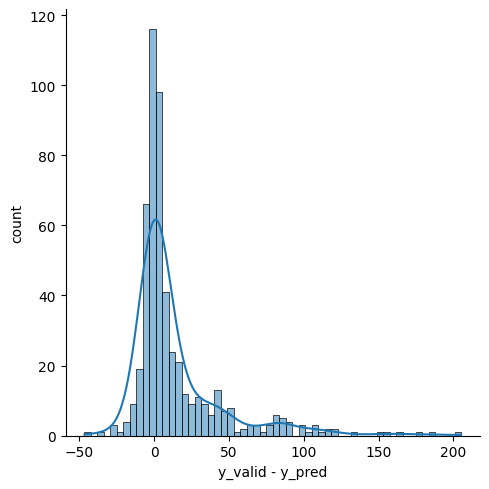

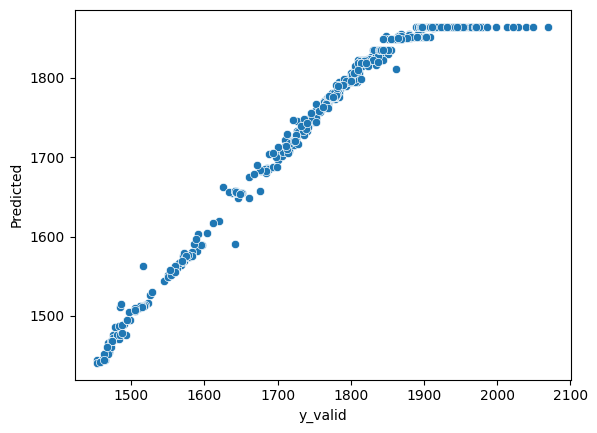

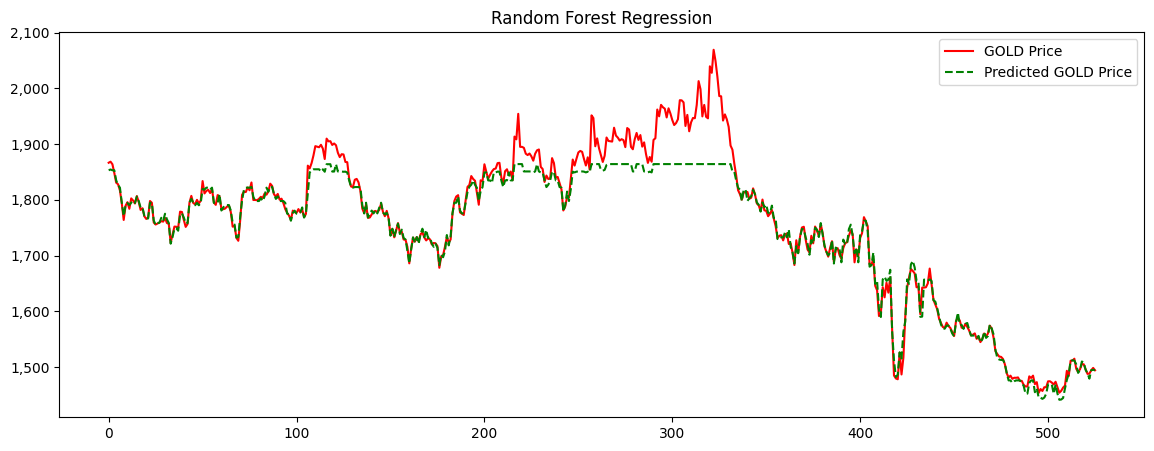

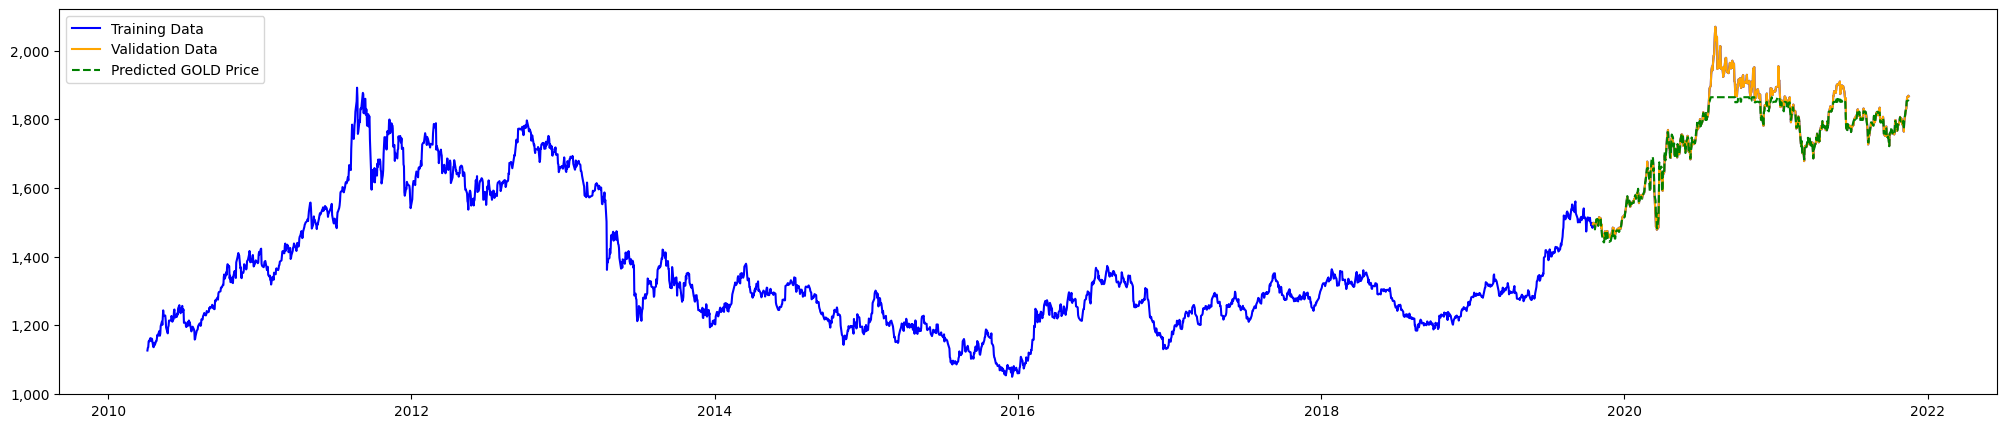

In [21]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = AUC(base_model, X_valid, y_valid, X_train, y_train)

### Evaluate the Best Random Search Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 3.3148607335437847
Mean Absolute Percentage Error (MAPE): 0.001625702138128097

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.2443243473162
 Mean Absolute Percentage Error (MAPE): 0.008605329123161455

R2 score: 0.942293468741418



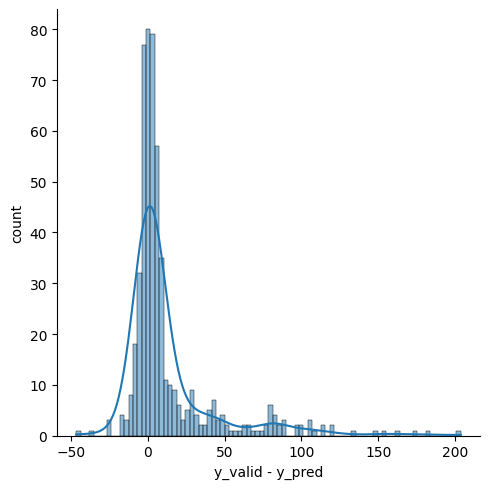

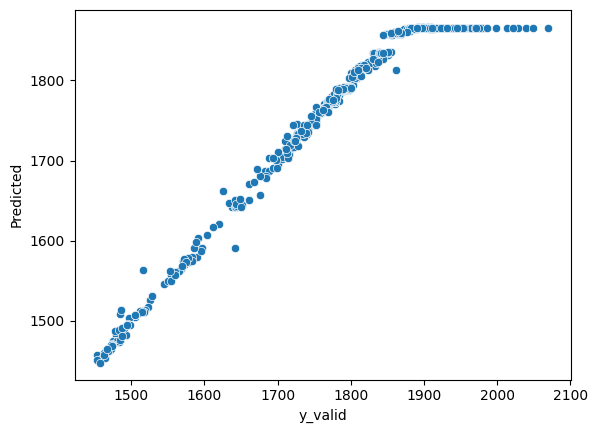

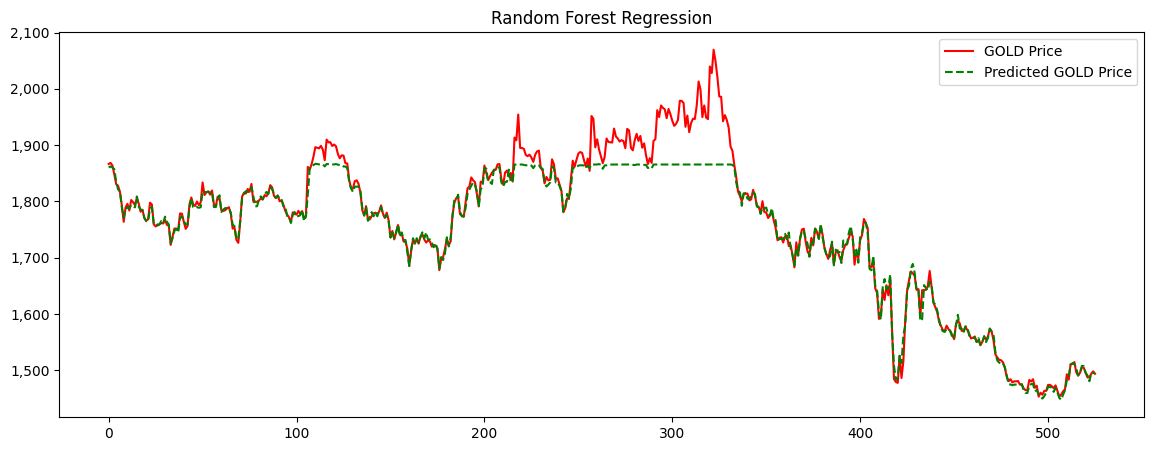

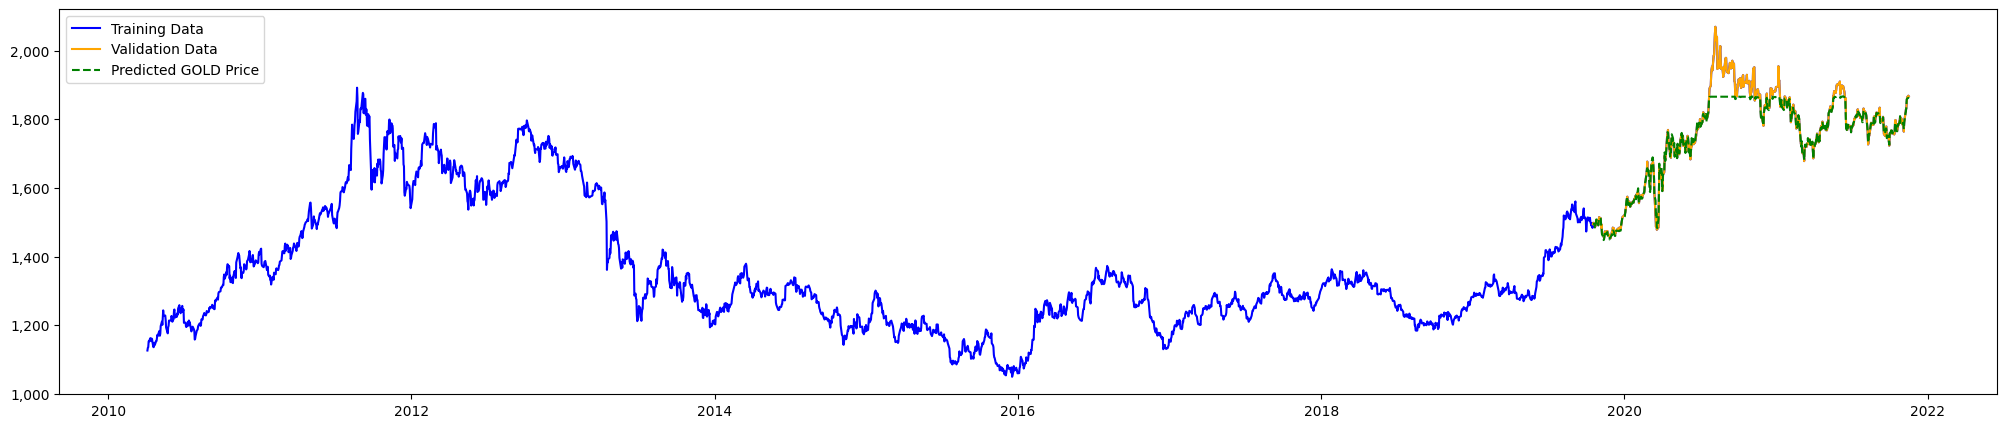

In [22]:
best_random = rf_random.best_estimator_
random_accuracy = AUC(best_random, X_valid, y_valid, X_train, y_train)

## Grid Search

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [23]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [6,8,10, None],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 300, 400, 500]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)
tscv = TimeSeriesSplit(n_splits=3)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, return_train_score=True)

In [24]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [25]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#### Evaluate the Best Model from Grid Search

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 3.0478086848268666
Mean Absolute Percentage Error (MAPE): 0.001602121899624677

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.710557654538995
 Mean Absolute Percentage Error (MAPE): 0.008927252117762383

R2 score: 0.9406635141982462



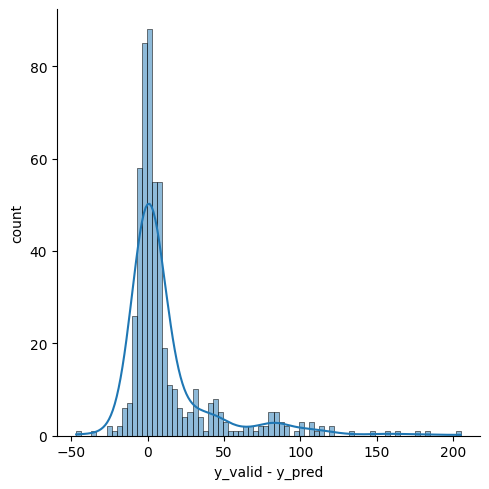

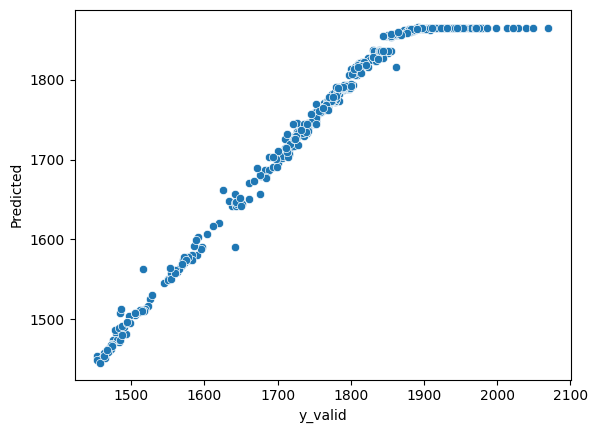

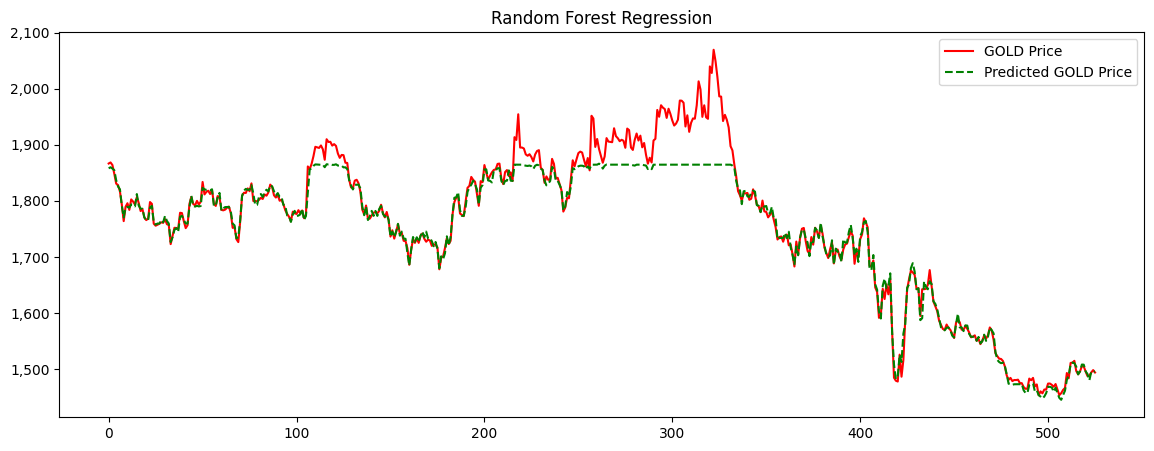

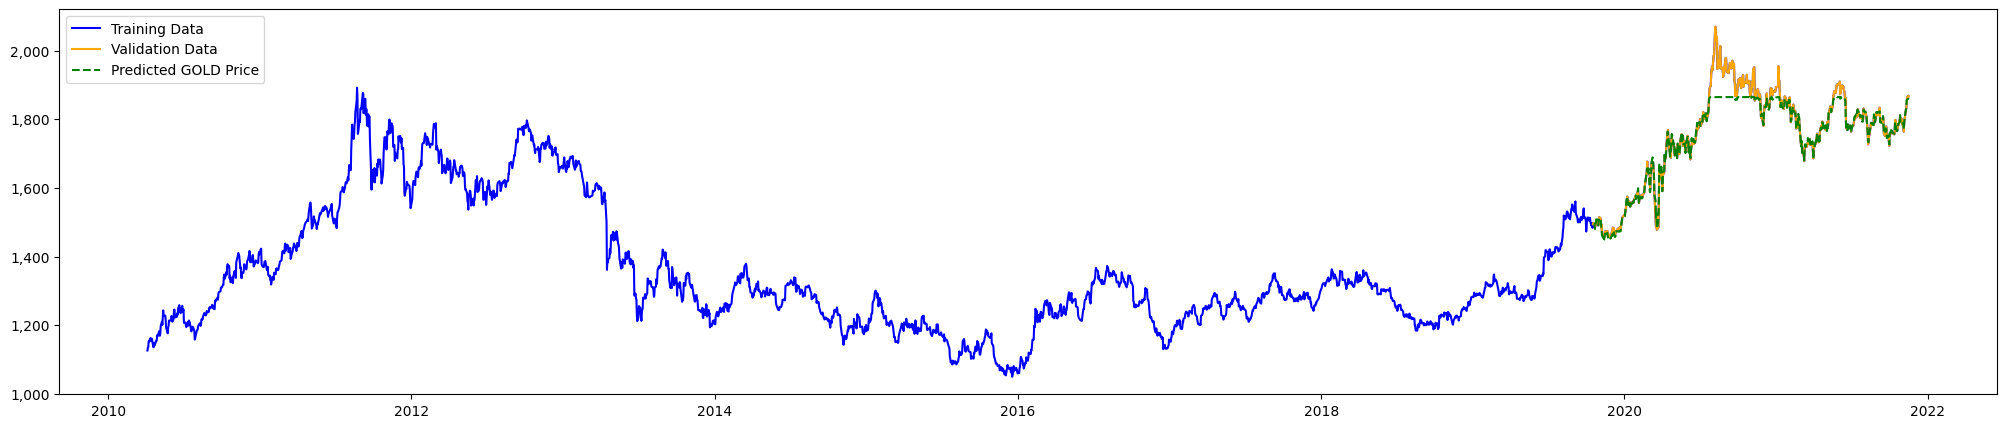

In [26]:
best_grid = grid_search.best_estimator_
grid_accuracy = AUC(best_grid, X_valid, y_valid, X_train, y_train)

## Comparison of All Improvement Techniques

In [27]:
import time

In [28]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test, model_filename):
    n_features = X_train.shape[1]
    n_trees = model.get_params()['n_estimators']
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions_test = []
    predictions_train_valid = []
    predictions_valid = []
    predictions_train = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train, y_train)
        predictions_valid.append(model.predict(X_valid))
        predictions_train.append(model.predict(X_train))
        end_time = time.time()
        run_times.append(end_time - start_time)
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train_valid, y_train_valid)
        predictions_test.append(model.predict(X_test))
        predictions_train_valid.append(model.predict(X_train_valid))
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions_test = np.mean(np.array(predictions_test), axis = 0)
    predictions_valid = np.mean(np.array(predictions_valid), axis = 0)
    predictions_train_valid = np.mean(np.array(predictions_train_valid), axis = 0)
    predictions_train = np.mean(np.array(predictions_train), axis = 0)

    print('Model Performance')
    print(30*'*')
    print("TRAIN & VALID PROCESSING")
    print("Test accuracy for train set")
    #RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print("Root Mean Square Error (RMSE):", rmse_train)

    #MAPE
    mape_train = mean_absolute_percentage_error(y_train, predictions_train)
    print(" Mean Absolute Percentage Error (MAPE):", mape_train)
    print()
    
    
    print("Test accuracy for valid set")
    #RMSE
    rmse_valid = np.sqrt(mean_squared_error(y_valid, predictions_valid))
    print("Root Mean Square Error (RMSE):", rmse_valid)

    #MAPE
    mape_valid = mean_absolute_percentage_error(y_valid, predictions_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_valid)
    print()
    
    #R2
    r2_valid = r2_score(y_valid, predictions_valid)
    print("R2 score:", r2_valid)
    print()
    
    print(30*'*')
    print("TRAIN-VALID & TEST PROCESSING")
    print("Test accuracy for train_valid set")
    #RMSE
    rmse_train_valid = np.sqrt(mean_squared_error(y_train_valid, predictions_train_valid))
    print("Root Mean Square Error (RMSE):", rmse_train_valid)

    #MAPE
    mape_train_valid = mean_absolute_percentage_error(y_train_valid, predictions_train_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_train_valid)
    print()
    
    print("Test accuracy for test set")
    #RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print("Root Mean Square Error (RMSE):", rmse_test)

    #MAPE
    mape_test = mean_absolute_percentage_error(y_test, predictions_test)
    print(" Mean Absolute Percentage Error (MAPE):", mape_test)
    print()
    
    #R2
    r2_test = r2_score(y_test, predictions_test)
    print("R2 score:", r2_test)
    print()
    

    joblib.dump(model, model_filename)
    # Return results in a dictionary
    results = {'time': run_time, 'RMSE_train': rmse_train, 'RMSE_valid': rmse_valid, 'RMSE_train_valid': rmse_train_valid,
               'RMSE_test': rmse_test, 'MAPE_train': mape_train, 'MAPE_valid': mape_valid,
               'MAPE_train_valid': mape_train_valid, 'MAPE_test': mape_test, 'R2_valid': r2_valid, 'R2_test': r2_test,
               'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [29]:
#### Default

In [30]:
base_results = evaluate_model(base_model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test, "base_model")

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 2.271335880170469
 Mean Absolute Percentage Error (MAPE): 0.0010518111132514912

Test accuracy for valid set
Root Mean Square Error (RMSE): 34.70236255257043
Mean Absolute Percentage Error (MAPE): 0.009649982920685394

R2 score: 0.9371206514709307

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 2.6853639102312368
Mean Absolute Percentage Error (MAPE): 0.0011089137670099536

Test accuracy for test set
Root Mean Square Error (RMSE): 10.492051415951899
 Mean Absolute Percentage Error (MAPE): 0.003927773072898798

R2 score: 0.9891975080029651



In [31]:
base_results['model'] = 'base_model'

In [32]:
base_results

{'time': 0.2335250735282898,
 'RMSE_train': 2.271335880170469,
 'RMSE_valid': 34.70236255257043,
 'RMSE_train_valid': 2.6853639102312368,
 'RMSE_test': 10.492051415951899,
 'MAPE_train': 0.0010518111132514912,
 'MAPE_valid': 0.009649982920685394,
 'MAPE_train_valid': 0.0011089137670099536,
 'MAPE_test': 0.003927773072898798,
 'R2_valid': 0.9371206514709307,
 'R2_test': 0.9891975080029651,
 'n_trees': 10,
 'n_features': 15,
 'model': 'base_model'}

#### Random Search Best Model

In [33]:
random_results = evaluate_model(best_random, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test, "best_random")

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 3.314860733543792
 Mean Absolute Percentage Error (MAPE): 0.0016257021381281024

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.2443243473162
Mean Absolute Percentage Error (MAPE): 0.008605329123161452

R2 score: 0.942293468741418

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 3.762998649671228
Mean Absolute Percentage Error (MAPE): 0.0016983097115918888

Test accuracy for test set
Root Mean Square Error (RMSE): 9.831220181765044
 Mean Absolute Percentage Error (MAPE): 0.003700494168916322

R2 score: 0.9905154227441012



In [34]:
random_results['model'] = 'best_random'

In [35]:
random_results

{'time': 7.844640552997589,
 'RMSE_train': 3.314860733543792,
 'RMSE_valid': 33.2443243473162,
 'RMSE_train_valid': 3.762998649671228,
 'RMSE_test': 9.831220181765044,
 'MAPE_train': 0.0016257021381281024,
 'MAPE_valid': 0.008605329123161452,
 'MAPE_train_valid': 0.0016983097115918888,
 'MAPE_test': 0.003700494168916322,
 'R2_valid': 0.942293468741418,
 'R2_test': 0.9905154227441012,
 'n_trees': 500,
 'n_features': 15,
 'model': 'best_random'}

#### First Grid Search Best Model

In [36]:
first_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test, "best_grid_1")
first_grid_results['model'] = 'first_grid'

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 3.047808684826865
 Mean Absolute Percentage Error (MAPE): 0.0016021218996246738

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.71055765453906
Mean Absolute Percentage Error (MAPE): 0.0089272521177624

R2 score: 0.940663514198246

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 3.4621901962193964
Mean Absolute Percentage Error (MAPE): 0.001673706053572268

Test accuracy for test set
Root Mean Square Error (RMSE): 9.509612022366717
 Mean Absolute Percentage Error (MAPE): 0.0035859670595873847

R2 score: 0.9911258098468464



In [37]:
first_grid_results

{'time': 4.744591295719147,
 'RMSE_train': 3.047808684826865,
 'RMSE_valid': 33.71055765453906,
 'RMSE_train_valid': 3.4621901962193964,
 'RMSE_test': 9.509612022366717,
 'MAPE_train': 0.0016021218996246738,
 'MAPE_valid': 0.0089272521177624,
 'MAPE_train_valid': 0.001673706053572268,
 'MAPE_test': 0.0035859670595873847,
 'R2_valid': 0.940663514198246,
 'R2_test': 0.9911258098468464,
 'n_trees': 300,
 'n_features': 15,
 'model': 'first_grid'}

#### Second Grid Search Best Model

In [38]:
second_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test, "best_grid_2")
second_grid_results['model'] = 'second_grid'

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 3.047808684826865
 Mean Absolute Percentage Error (MAPE): 0.0016021218996246738

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.71055765453906
Mean Absolute Percentage Error (MAPE): 0.0089272521177624

R2 score: 0.940663514198246

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 3.4621901962193964
Mean Absolute Percentage Error (MAPE): 0.001673706053572268

Test accuracy for test set
Root Mean Square Error (RMSE): 9.509612022366717
 Mean Absolute Percentage Error (MAPE): 0.0035859670595873847

R2 score: 0.9911258098468464



In [39]:
second_grid_results

{'time': 4.744790232181549,
 'RMSE_train': 3.047808684826865,
 'RMSE_valid': 33.71055765453906,
 'RMSE_train_valid': 3.4621901962193964,
 'RMSE_test': 9.509612022366717,
 'MAPE_train': 0.0016021218996246738,
 'MAPE_valid': 0.0089272521177624,
 'MAPE_train_valid': 0.001673706053572268,
 'MAPE_test': 0.0035859670595873847,
 'R2_valid': 0.940663514198246,
 'R2_test': 0.9911258098468464,
 'n_trees': 300,
 'n_features': 15,
 'model': 'second_grid'}

## Comparison

In [40]:
comparison = {
    'RMSE_train_valid': [],
    'RMSE_valid': [],
    'RMSE_train': [],
    'RMSE_test': [],
    'MAPE_train_valid': [],
    'MAPE_valid': [],
    'MAPE_test': [],
    'MAPE_train': [],
    'R2_valid' : [],
    'R2_test' : [],
    'model': [],
    'n_features': [],
    'n_trees': [],
    'time': []}
for model in [base_results, random_results, first_grid_results, second_grid_results]:
    comparison['RMSE_train_valid'].append(round(model['RMSE_train_valid'], 3))
    comparison['RMSE_valid'].append(round(model['RMSE_valid'], 3))
    comparison['RMSE_train'].append(round(model['RMSE_train'], 3))
    comparison['RMSE_test'].append(round(model['RMSE_test'], 3))
    comparison['MAPE_train_valid'].append(round(model['MAPE_train_valid'], 3))
    comparison['MAPE_valid'].append(round(model['MAPE_valid'], 3))
    comparison['MAPE_train'].append(round(model['MAPE_train'], 3))
    comparison['MAPE_test'].append(round(model['MAPE_test'], 3))
    comparison['R2_test'].append(round(model['R2_test'], 3))
    comparison['R2_valid'].append(round(model['R2_valid'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))


In [41]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [42]:
comparison[['model','RMSE_train', 'RMSE_valid', 'RMSE_train_valid','RMSE_test', 'MAPE_train', 'MAPE_valid', 'MAPE_train_valid', 'MAPE_test', 'R2_valid', 'R2_test', 'n_features', 'n_trees', 'time']]


,model,RMSE_train,RMSE_valid,RMSE_train_valid,RMSE_test,MAPE_train,MAPE_valid,MAPE_train_valid,MAPE_test,R2_valid,R2_test,n_features,n_trees,time
0,base_model,2.271,34.702,2.685,10.492,0.001,0.010,0.001,0.004,0.937,0.989,15,10,0.2335
1,best_random,3.315,33.244,3.763,9.831,0.002,0.009,0.002,0.004,0.942,0.991,15,500,7.8446
2,first_grid,3.048,33.711,3.462,9.510,0.002,0.009,0.002,0.004,0.941,0.991,15,300,4.7446
3,second_grid,3.048,33.711,3.462,9.510,0.002,0.009,0.002,0.004,0.941,0.991,15,300,4.7448


## Plotting 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

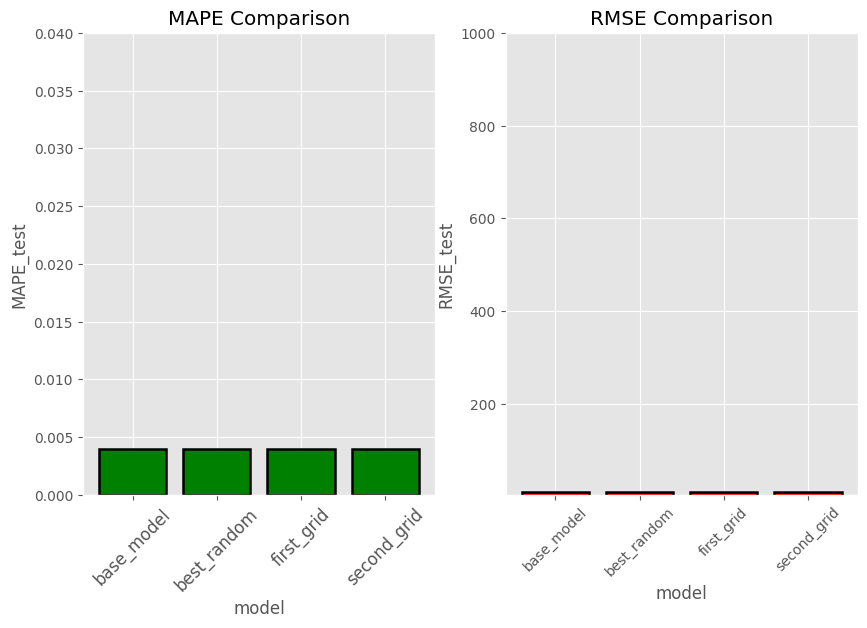

In [44]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['MAPE_test'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 0, ymax = 0.04)
plt.xlabel('model'); plt.ylabel('MAPE_test'); plt.title('MAPE Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['RMSE_test'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 3.5, ymax = 1000)
plt.xlabel('model'); plt.ylabel('RMSE_test'); plt.title('RMSE Comparison');
plt.show();

## Final Model & Evaluation

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 3.462190196219394
Mean Absolute Percentage Error (MAPE): 0.001673706053572268

Test accuracy for test set
Root Mean Square Error (RMSE): 9.50961202236674
 Mean Absolute Percentage Error (MAPE): 0.0035859670595873964

R2 score: 0.9911258098468464



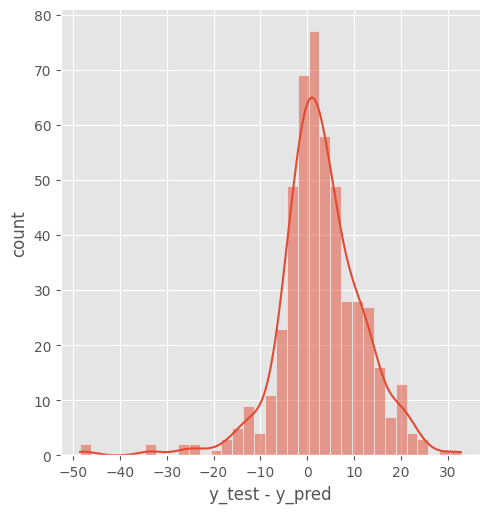

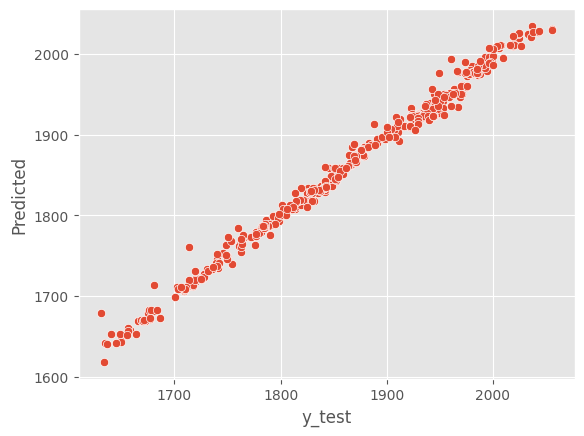

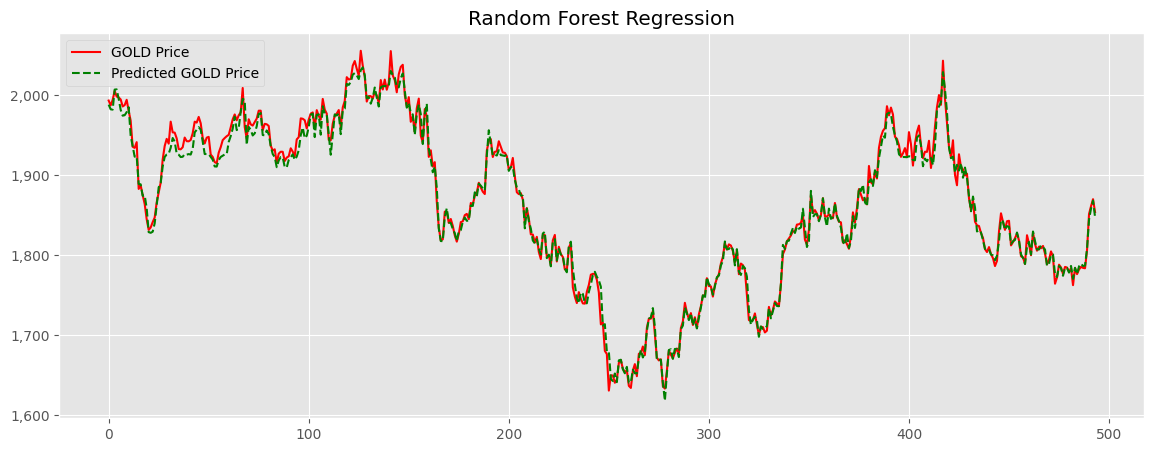

In [45]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = ACC(final_model, X_test, y_test, X_train_valid, y_train_valid)

## Importance Feature

In [46]:
features = X_train.columns
# Get numerical feature importances
importances = list(final_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: GOLD_open            Importance: 0.949
Variable: GOLD_high            Importance: 0.0506
Variable: GOLD_low             Importance: 0.0003
Variable: copper               Importance: 0.0
Variable: crude_oil            Importance: 0.0
Variable: DXY                  Importance: 0.0
Variable: EURUSD               Importance: 0.0
Variable: MSCI                 Importance: 0.0
Variable: NASDAQ               Importance: 0.0
Variable: NLR                  Importance: 0.0
Variable: platinum             Importance: 0.0
Variable: RUT                  Importance: 0.0
Variable: silver               Importance: 0.0
Variable: SP500                Importance: 0.0
Variable: VIX                  Importance: 0.0


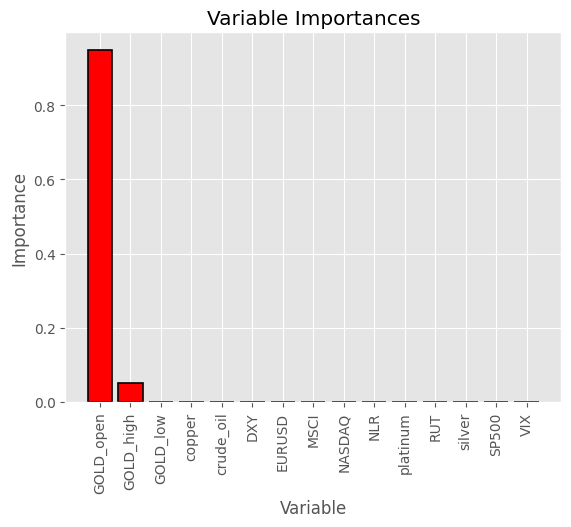

In [47]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

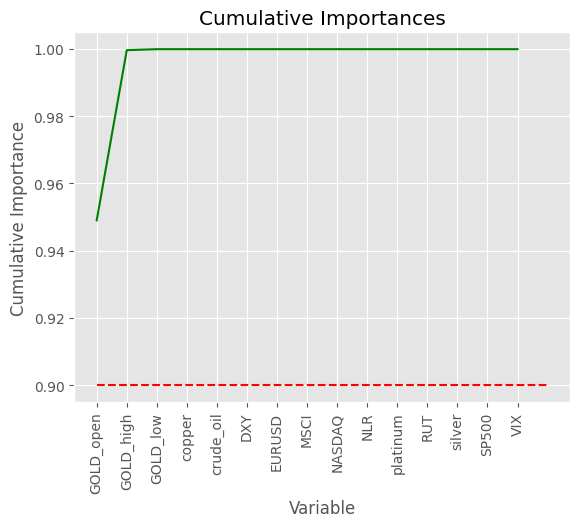

In [48]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [49]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
num = np.where(cumulative_importances > 0.9)[0][0] + 1
print('Number of features for 90% importance:', num)

Number of features for 90% importance: 1


In [50]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]
print(important_feature_names)

['GOLD_open']


In [51]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_model.estimators_[12]
export_graphviz(visual_tree, out_file = '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.dot', feature_names = X_train.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

In [52]:
# Use pydot for converting to an image file
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.dot')
graph.write_png('/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.png')